## Aqui comienzo el EDA O Analisis Exploratorio de Datos

In [1]:
import pandas as pd 
import seaborn
import matplotlib
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
#creo mi dataframe
data = pd.read_csv(r'D:\Denise_Estudio\henry\PI\datos\movies_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23572 entries, 0 to 23571
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      23572 non-null  float64
 1   id                          23572 non-null  int64  
 2   original_language           23572 non-null  object 
 3   overview                    23572 non-null  object 
 4   popularity                  23572 non-null  float64
 5   release_date                23572 non-null  object 
 6   revenue                     23572 non-null  int64  
 7   runtime                     23572 non-null  float64
 8   status                      23572 non-null  object 
 9   title                       23572 non-null  object 
 10  vote_average                23572 non-null  float64
 11  vote_count                  23572 non-null  float64
 12  genres_clean                23572 non-null  object 
 13  companies_names             235

In [4]:
data

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,vote_count,genres_clean,companies_names,spoken_languages_clear,production_countries_clean,name_collection,return,release_year,cast_clean,director
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,Toy Story,...,5415.0,"Animation, Comedy, Family",Pixar Animation Studios,English,United States of America,Toy Story Collection,12.451801,1995,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Jumanji,...,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...","English, Français",United States of America,0,4.043035,1995,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Released,Grumpier Old Men,...,92.0,"Romance, Comedy","Warner Bros., Lancaster Gate",English,United States of America,Grumpy Old Men Collection,0.000000,1995,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Waiting to Exhale,...,34.0,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,English,United States of America,0,5.090760,1995,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Released,Father of the Bride Part II,...,173.0,Comedy,"Sandollar Productions, Touchstone Pictures",English,United States of America,Father of the Bride Collection,0.000000,1995,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23567,0.0,24388,en,A teenager enters the competitive world of gro...,0.996333,2007-09-14,0,94.0,Released,Bag Boy,...,4.0,"Drama, Comedy",no register,English,NaN,0,0.000000,2007,"Dennis Farina, Paul Campbell, Marika Dominczyk...",Mort Nathan
23568,0.0,39885,ja,"After the mysterious death of her mother, a yo...",1.941312,1974-02-16,0,91.0,Released,School of the Holy Beast,...,18.0,Drama,no register,日本語,Japan,0,0.000000,1974,"Yumi Takigawa, Emiko Yamauchi, Yayoi Watanabe,...",Norifumi Suzuki
23569,0.0,47057,en,Dennis Jennings (Steven Wright) is an introver...,0.078166,1988-01-01,0,29.0,Released,The Appointments Of Dennis Jennings,...,1.0,Comedy,no register,NaN,United States of America,0,0.000000,1988,"Steven Wright, Rowan Atkinson, Laurie Metcalf,...",Dean Parisot
23570,0.0,65456,en,A scientist obsessed with World War III hits t...,0.140566,2000-06-05,0,105.0,Released,The Atrocity Exhibition,...,2.0,"Drama, Horror",The Business (New York),English,United States of America,0,0.000000,2000,"Victor Slezak, Anna Juvander, Michael Kirby, M...",Jonathan Weiss


In [5]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,return,release_year
count,2.357200e+04,23572.000000,23572.000000,2.357200e+04,23572.000000,23572.000000,23572.000000,2.357200e+04,23572.000000
mean,6.637058e+06,52780.640378,3.892023,1.749941e+07,99.949007,5.937057,162.653657,1.227894e+03,1988.672366
std,2.098244e+07,58495.312835,4.795846,7.620223e+07,31.726320,1.549380,585.812932,1.034256e+05,23.035047
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1893.000000
25%,0.000000e+00,14234.750000,0.715113,0.000000e+00,89.000000,5.400000,6.000000,0.000000e+00,1976.000000
50%,0.000000e+00,34467.500000,2.044862,0.000000e+00,98.000000,6.200000,18.000000,0.000000e+00,1997.000000
75%,5.000000e+05,67381.750000,6.102030,4.725000e+01,110.000000,6.900000,71.000000,0.000000e+00,2007.000000
max,3.800000e+08,469172.000000,185.070892,2.787965e+09,1140.000000,10.000000,14075.000000,1.239638e+07,2016.000000


In [6]:
#busacar valores validos
data.isnull().sum()


budget                           0
id                               0
original_language                0
overview                         0
popularity                       0
release_date                     0
revenue                          0
runtime                          0
status                           0
title                            0
vote_average                     0
vote_count                       0
genres_clean                     0
companies_names                  0
spoken_languages_clear        1292
production_countries_clean    2139
name_collection                  0
return                           0
release_year                     0
cast_clean                     760
director                         0
dtype: int64

In [7]:
#número total de valores en el DataFrame
total_valores = data.size

In [8]:
#encontrar los valores únicos de generos 
data['genres_clean'].unique()


array(['Animation, Comedy, Family', 'Adventure, Fantasy, Family',
       'Romance, Comedy', ...,
       'Drama, Horror, Action, Thriller, Crime, Foreign',
       'Drama, Action, Romance, Western',
       'Adventure, Drama, Horror, Mystery, Thriller'], dtype=object)

In [9]:
data['release_date'].unique()

array(['1995-10-30', '1995-12-15', '1995-12-22', ..., '1987-12-05',
       '1974-02-16', '2000-06-05'], dtype=object)

In [10]:
#buscar datos que no correspondan
invalid_dates = data[~pd.to_datetime(data['release_date'], errors='coerce').notnull()]

In [11]:
#este esta vacio
invalid_dates

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,vote_count,genres_clean,companies_names,spoken_languages_clear,production_countries_clean,name_collection,return,release_year,cast_clean,director


Limpieza de datos

In [12]:
#limpiar de caracteres raros
import re
#aracteres permitidos
regex = re.compile(r'^[a-zA-Z0-9\s\.,\?!-]+$')

#filtrar el DataFrame
df_clean = data[data['title'].apply(lambda x: bool(regex.match(x)))]


ahora mi df queda del siguiente tamaño

In [13]:
df_clean.shape

(20438, 21)

## Gráficos
Gráfico de nube de palabras

In [14]:
#Concatenar todos los textos en una sola cadena para text con titulos y text2 con generos
text = ','.join(data['title'])
text.split(',')

text2 = ' '.join(data['genres_clean'])
text.split(',')

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II',
 'Heat',
 'Sabrina',
 'Tom and Huck',
 'Sudden Death',
 'GoldenEye',
 'The American President',
 'Dracula: Dead and Loving It',
 'Balto',
 'Nixon',
 'Cutthroat Island',
 'Casino',
 'Sense and Sensibility',
 'Four Rooms',
 'Ace Ventura: When Nature Calls',
 'Money Train',
 'Get Shorty',
 'Copycat',
 'Assassins',
 'Powder',
 'Leaving Las Vegas',
 'Othello',
 'Now and Then',
 'Persuasion',
 'The City of Lost Children',
 'Shanghai Triad',
 'Dangerous Minds',
 'Twelve Monkeys',
 'Babe',
 'Carrington',
 'Dead Man Walking',
 'Across the Sea of Time',
 'It Takes Two',
 'Clueless',
 'Cry',
 ' the Beloved Country',
 'Richard III',
 'Dead Presidents',
 'Restoration',
 'Mortal Kombat',
 'To Die For',
 'How To Make An American Quilt',
 'Se7en',
 'Pocahontas',
 'When Night Is Falling',
 'The Usual Suspects',
 'Guardian Angel',
 'Mighty Aphrodite',
 'Lamerica',
 'The Big Green',
 'Georgia',
 'Kids of 

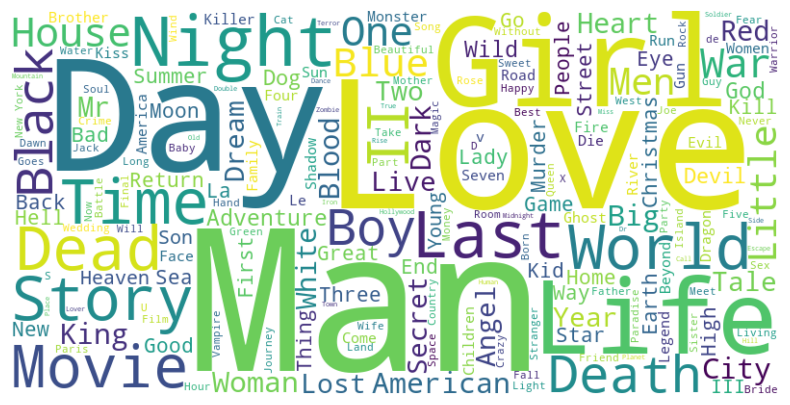

In [15]:
#creo la nube de palabras para titulo
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

las palabras LOVE, MAN, GIRL, DAY, NIGTH son las mas repetidas en los titulos de peliculas

In [16]:
#cuento cuantas veces se repite
print(text.count('Love'))
print(text.count('Man'))
print(text.count('Girl'))

386
505
233


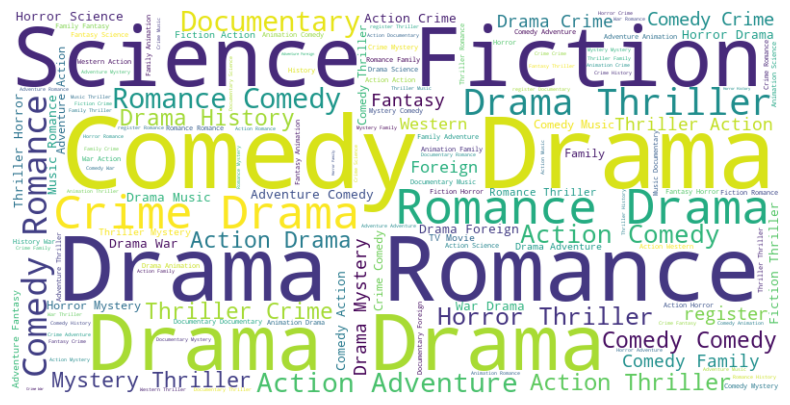

In [17]:
#creo la nube de palabras para generos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Las palabras DRAMA, ROMANCE, SCIENCE FICTION son las mas mencionadas entre los generos teniendo la mayor frecuencia

In [18]:
#cuento cuantas veces se repite
print(text2.count('Drama'))
print(text2.count('Romance'))
print(text2.count('Science Fiction'))

12007
4322
1699


Buscar outliers

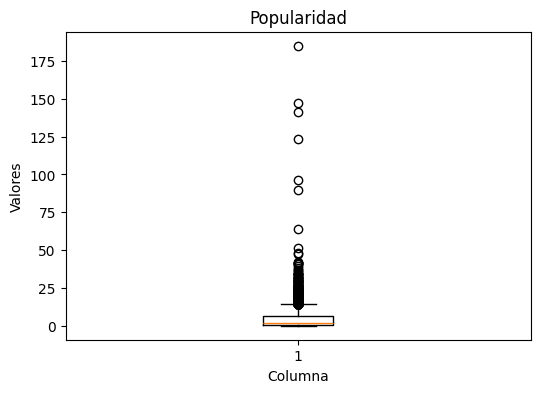

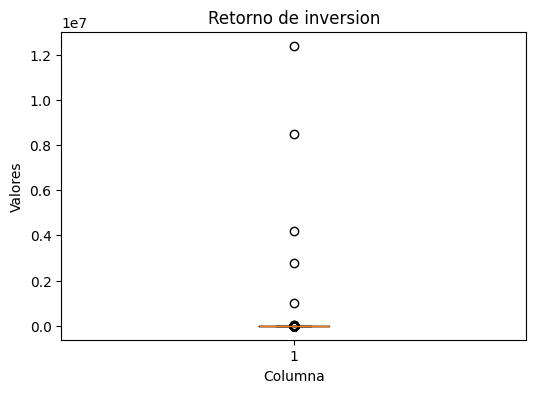

In [19]:
#poipularity
plt.figure(figsize=(6, 4))
plt.boxplot(data['popularity'])
plt.title('Popularidad')
plt.xlabel('Columna')
plt.ylabel('Valores')
plt.show()

plt.figure(figsize=(6, 4))
plt.boxplot(data['return'])
plt.title('Retorno de inversion')
plt.xlabel('Columna')
plt.ylabel('Valores')
plt.show()

In [20]:
#encontrar el titulo del valor máximo en la columna 'popularity'
popularyty_max = data.loc[data['popularity'].idxmax()]['title']
popularyty_max


'Avatar'

In [21]:
#encontrar el índice del valor máximo en la columna 'return'
popularyty_max = data.loc[data['return'].idxmax()]['title']
popularyty_max

'Less Than Zero'

Quito del dataframe lo que no usaria para mi modelo

In [22]:
#la columna budget tiene muchos valores 0, lo cual tambien afecta a return
repeticiones_cero = (data['budget'] == 0.0).sum()
repeticiones_cero

17033

In [23]:
#la columna name_collection tiene muchos datos en 0 por lo que no considero que podria ser de utilidad
data['name_collection'].str.count('0').sum()


20833

In [24]:
#la columna budget tiene muchos valores 0
contar_cero =(data['revenue'] == 0).sum()
contar_cero
	

17613

In [25]:
data['spoken_languages_clear'].isna().sum()

1292

Borro columnas que no considero que podrian ser de utilidad para mi modelo

In [26]:
data.drop(columns=['budget','id','release_date','status','runtime', 'production_countries_clean','revenue','spoken_languages_clear','vote_count','original_language','name_collection','return', 'release_year'], inplace=True)

In [41]:
data.drop(columns=[ 'overview','popularity','vote_average','cast_clean'], inplace=True)

In [42]:
data

,title,genres_clean,companies_names,director
0,toy story,"Animation, Comedy, Family",Pixar Animation Studios,John Lasseter
1,jumanji,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...",Joe Johnston
2,grumpier old men,"Romance, Comedy","Warner Bros., Lancaster Gate",Howard Deutch
3,waiting to exhale,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,Forest Whitaker
4,father of the bride part ii,Comedy,"Sandollar Productions, Touchstone Pictures",Charles Shyer
...,...,...,...,...
23567,bag boy,"Drama, Comedy",no register,Mort Nathan
23568,school of the holy beast,Drama,no register,Norifumi Suzuki
23569,the appointments of dennis jennings,Comedy,no register,Dean Parisot
23570,the atrocity exhibition,"Drama, Horror",The Business (New York),Jonathan Weiss


tomo una muestra para mi modelo

pasar valores de columna title a minusculas antes de tomar la muestra

In [43]:
data['title'] = data['title'].apply(lambda x: x.lower())

In [44]:
muestra = data.head(5000)

In [45]:
#guardoo la muestra
muestra.to_csv(r'D:\Denise_Estudio\henry\PI\datos\muestra.csv', index=False)


In [35]:
df_r= pd.read_csv(r'D:\Denise_Estudio\henry\PI\datos\movies_data.csv')